In [1]:
import pandas as pd

file_path = "gold_historical_data_cleaned.csv"
df = pd.read_csv(file_path)
df.head()


,Date,Close,High,Low,Open,Volume
0,2019-01-02,1281.0,1286.0,1277.6,1286.0,149
1,2019-01-03,1291.8,1292.0,1286.7,1286.8,10
2,2019-01-04,1282.7,1294.2,1275.3,1294.2,34
3,2019-01-07,1286.8,1286.8,1286.6,1286.8,2
4,2019-01-08,1283.2,1283.2,1278.2,1280.5,54


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df['Return'] = df['Close'].pct_change()
df['Open_Close_Change'] = (df['Close'] - df['Open']) / df['Open']
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df = df.dropna().reset_index(drop=True)
train_df = df[df['Date'] < '2024-01-01']
test_df = df[df['Date'] >= '2024-01-01']
features_time = ['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']
X_train_time = train_df[features_time]
y_train_time = train_df['Target']
X_test_time = test_df[features_time]
y_test_time = test_df['Target']

scaler = StandardScaler()
X_train_time_scaled = scaler.fit_transform(X_train_time)
X_test_time_scaled = scaler.transform(X_test_time)

model_time = LogisticRegression()
model_time.fit(X_train_time_scaled, y_train_time)

y_pred_time = model_time.predict(X_test_time_scaled)
accuracy_time = accuracy_score(y_test_time, y_pred_time)
report_time = classification_report(y_test_time, y_pred_time)

conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)
accuracy_time, report_time, conf_matrix_time


(0.4229390681003584,
 '              precision    recall  f1-score   support\n\n           0       0.41      0.80      0.54       117\n           1       0.51      0.15      0.23       162\n\n    accuracy                           0.42       279\n   macro avg       0.46      0.48      0.38       279\nweighted avg       0.47      0.42      0.36       279\n',
 array([[ 94,  23],
        [138,  24]]))

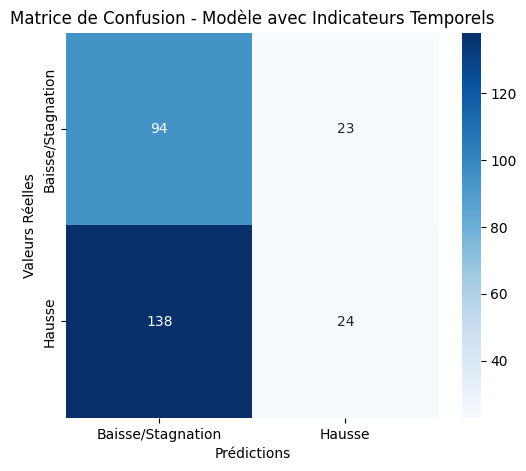

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_time, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Modèle avec Indicateurs Temporels")
plt.show()
